In [4]:
# Import the required libraries
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from openbb_terminal.sdk import openbb

import matplotlib.pyplot as plt

In [2]:
# Use the OpenBB SDK to get the unemployment data.

df = openbb.economy.unemp(2010)
df = df.set_index("date")[:"2019-12-31"].sort_index()

### Decompose the time series for seasonality and trend

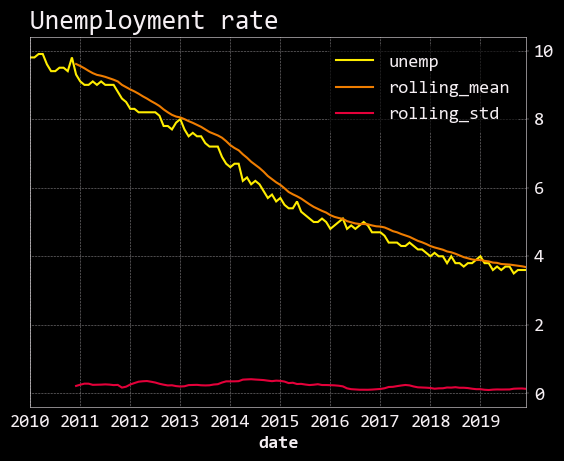

In [5]:
# Start with visualizing the data through time by plotting the time series.

df["rolling_mean"] = df["unemp"].rolling(window=12).mean()
df["rolling_std"] = df["unemp"].rolling(window=12).std()
df.plot(title="Unemployment rate");


# Save the figure.
plt.savefig("./Images/UnemploymentRate.jpg")

There’s a clear downward trend in the unemployment rate. There also appears to be some consistent spikes. Time series decomposition should pick up these patterns.

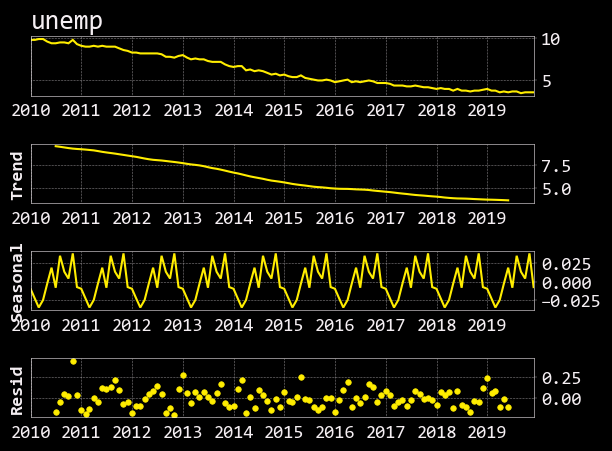

In [6]:
# Run the model and plot the results.
decomposition_results = seasonal_decompose(
    df["unemp"], 
    model="additive"
).plot()

# Save the figure.
plt.savefig("./Images/SeasonalDecomposition.jpg")

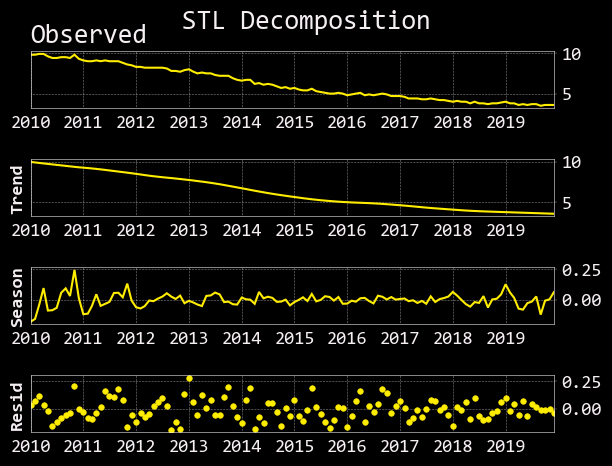

In [8]:
# Decompose the time series with LOESS
stl_decomposition = STL(df[["unemp"]]).fit()
stl_decomposition.plot().suptitle("STL Decomposition");

# Save the figure.
plt.savefig("./Images/StlDecomposition.jpg")
